In [1]:
# visulazation
#from pyvirtualdisplay import Display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action = 'ignore')

# matplotlib 한글 사용을 위한 코드
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
df_Toomics100 = pd.read_csv("./df_Toomics100_2.csv")

In [3]:
#df_Toomics100

In [4]:
df_Toomics100 = df_Toomics100[['rank', 'id', 'title', 'count_episode', 'genre', 'keywords', 'each_published_dates']]

In [5]:
df_Toomics100['genre'].unique()

array(['학원/액션', '스포츠', '판타지', '드라마', '개그', '무협/시대극', '로맨스', '공포/스릴러'],
      dtype=object)

In [6]:
df_Toomics100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rank                  100 non-null    int64 
 1   id                    100 non-null    int64 
 2   title                 100 non-null    object
 3   count_episode         100 non-null    object
 4   genre                 100 non-null    object
 5   keywords              100 non-null    object
 6   each_published_dates  100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [7]:
df_Toomics100.describe()

,rank,id
count,100.000000,100.000000
mean,50.500000,4651.890000
std,29.011492,1051.777484
min,1.000000,253.000000
25%,25.750000,4674.750000
50%,50.500000,4945.500000
75%,75.250000,5216.750000
max,100.000000,5477.000000


### Which Genre is the most popular in Toomics?

In [8]:

df_sorted_genre = df_Toomics100.groupby('genre').agg({'title' : 'count'}).sort_values('title', ascending = False).reset_index()
df_sorted_genre['genre_count'] = df_sorted_genre['title']
df_sorted_genre = df_sorted_genre[['genre', 'genre_count']]

In [19]:
# seaborn type
print('Seaborn version : ', sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.10.1


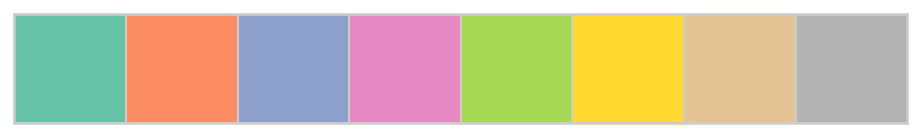

In [20]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
current_palatte = sns.color_palette('Set2')
sns.palplot(current_palatte)


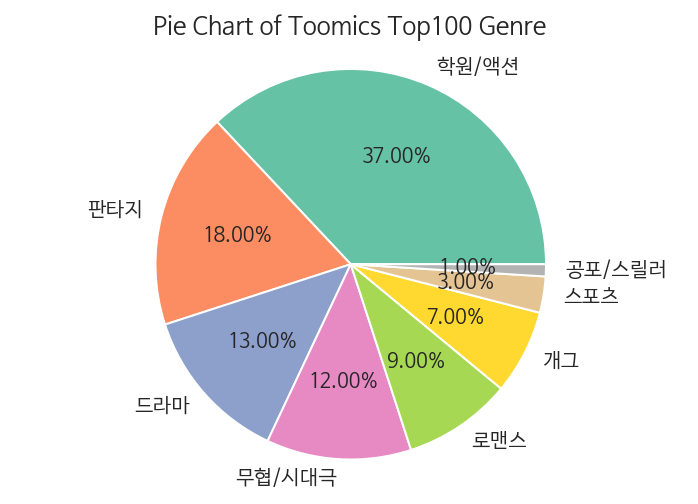

In [14]:
#colors
group_colors = current_palatte

# Pie size 
#plt.reParams['figure.figsize'] = [12, 8]



# Pie chart
plt.pie(df_sorted_genre['genre_count'], 
       labels=df_sorted_genre['genre'],
       colors = group_colors,
       autopct = '%1.2f%%',
       textprops = {'fontsize': 10})

plt.axis('equal')
plt.title('Pie Chart of Toomics Top100 Genre')
plt.show()

In [15]:
# extract number from cout_episode

numbers = []
for i in range(len(df_Toomics100)):
    number = df_Toomics100['count_episode'][i][:-1]
    numbers.append(number)
    
df_Toomics100['number'] = numbers

In [16]:
# df_Toomics100['number'] type: object -> int
df_Toomics100['number'] = df_Toomics100['number'].astype(int)

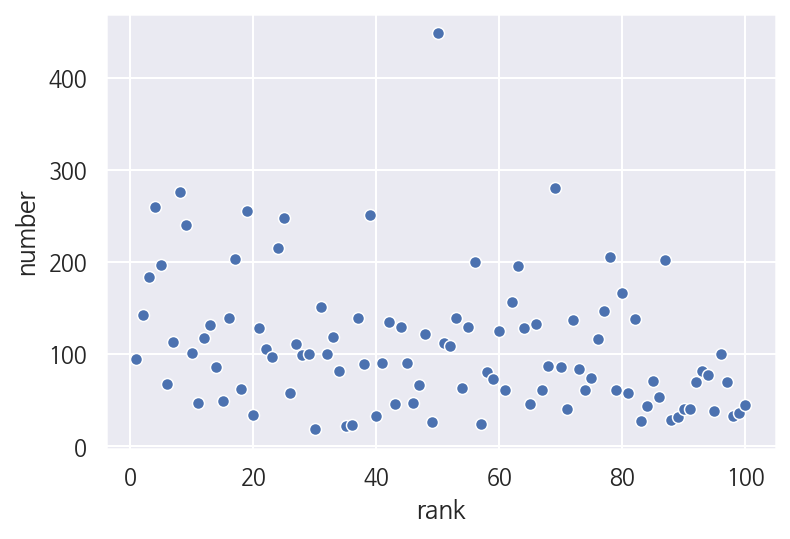

In [17]:
# relationship between rank and episode_number(=number)?
# ne relationship
ax = sns.scatterplot(x='rank', y='number', data = df_Toomics100)

In [18]:
# than what is the max episode?
df_Toomics100[df_Toomics100['number'] == df_Toomics100['number'].max()]

,rank,id,title,count_episode,genre,keywords,each_published_dates,number
49,50,5277,정령사:나타르 전기,448화,판타지,"['#토요연재', '#빙의', '#이세계', '#모험', '#능력자']","[['1화', '정령사:나타르 전기', '2020.04.11', '무료', ''],...",448


### which uploaded day is the popular?

In [8]:
# listed published date > splited date > re.searched date
# test
test1 = df_Toomics100['each_published_dates'][0].split('],')[0]

In [9]:
#step1: total episode number, split
import re

df_Toomics100['published_dates_clear'] = ''
df_Toomics100['count_date_error'] = ''
for i in range(len(df_Toomics100)):
    splited_date = df_Toomics100['each_published_dates'][i].split('],')
    
    #step2: in spilited data, re.search
    published_date_list = []
    count  = 0
    for n in range(len(splited_date)):
        
        expression = splited_date[n]
        match = re.search('\d+.\d+.\d+', expression)
        if match is not None:
            published_date = match.group()
            published_date_list.append(published_date)
        
        # when there is no match, group() doesn't work
        else:
            count+=1
            df_Toomics100['count_date_error'][i] = count
    df_Toomics100['published_dates_clear'][i] = published_date_list
    

In [10]:
df_Toomics100['first_episode_date'] = '' 
for i in range(len(df_Toomics100)):
    df_Toomics100['first_episode_date'][i] = df_Toomics100['published_dates_clear'][i][0]

In [11]:
df_Toomics100['seconde_updated_date'] = ''
for i in range(len(df_Toomics100)):
    compare = df_Toomics100['published_dates_clear'][i]
    
    ls_2nd_updated_list = []
    for n in range(len(compare)):
        if compare[0] == compare[n]:
            
            pass
        
        else:
            ls_2nd_updated = compare[n]
            ls_2nd_updated_list.append(ls_2nd_updated)
            if len(ls_2nd_updated_list) == 1:
                break
        df_Toomics100['seconde_updated_date'][i] = ls_2nd_updated_list
    #print(df_Toomics100['title'][i], compare[0], df_Toomics100['seconde_updated_date'][i])
        
            


In [12]:
import datetime
#from datetime import datetime

def time_format(t):
    datetimed_style = datetime.datetime.strptime(t, '%Y.%m.%d')
    return datetimed_style



In [13]:
df_Toomics100['timed_1st_epi'] = df_Toomics100['first_episode_date'].apply(time_format)

In [14]:
df_Toomics100['seconde_updated_date'] = [''.join(date) for date in df_Toomics100['seconde_updated_date']]

In [15]:
df_Toomics100['timed_2nd_epi'] = ''
for i in range(len(df_Toomics100)):
    test_t = df_Toomics100['seconde_updated_date'][i]
    if df_Toomics100['seconde_updated_date'][i] != '':
        df_Toomics100['timed_2nd_epi'][i] = datetime.datetime.strptime(test_t, '%Y.%m.%d')
    else:
        pass

In [16]:
# 1st epi -> a day of week
df_Toomics100['uploaded_day'] = [date.strftime('%A') for date in df_Toomics100['timed_1st_epi']]

In [17]:
df_sorted_weekday = df_Toomics100.groupby('uploaded_day').agg({'title' : 'count'}).sort_values('title', ascending = False).reset_index()
df_sorted_weekday['uploaded_day_count'] = df_sorted_weekday['title']
df_sorted_weekday = df_sorted_weekday[['uploaded_day', 'uploaded_day_count']]
df_sorted_weekday

,uploaded_day,uploaded_day_count
0,Tuesday,18
1,Friday,16
2,Monday,15
3,Thursday,14
4,Wednesday,14
5,Sunday,12
6,Saturday,11


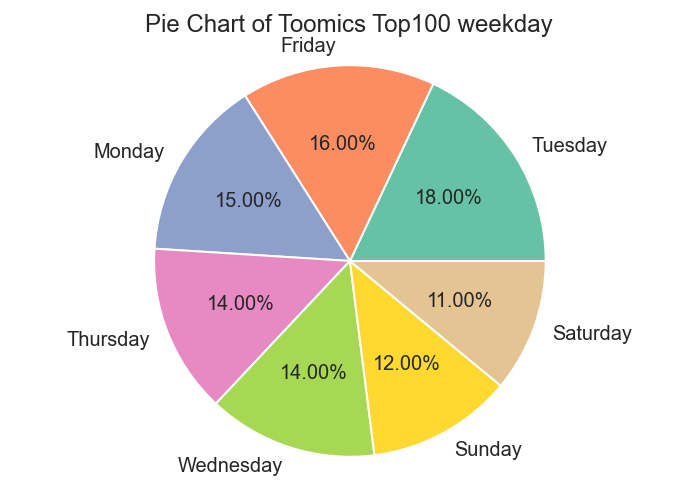

In [21]:
#colors
group_colors = current_palatte

# Pie size 
#plt.reParams['figure.figsize'] = [12, 8]



# Pie chart
plt.pie(df_sorted_weekday['uploaded_day_count'], 
       labels=df_sorted_weekday['uploaded_day'],
       colors = group_colors,
       autopct = '%1.2f%%',
       textprops = {'fontsize': 10})

plt.axis('equal')
plt.title('Pie Chart of Toomics Top100 weekday')
plt.show()

In [22]:
df_Toomics100['timed_2nd_epi2'] = ''

In [23]:
df_Toomics100['timed_2nd_epi2'] = pd.to_datetime(df_Toomics100['timed_2nd_epi'])

### which term is popular?

In [24]:
test2 = df_Toomics100['timed_2nd_epi2'][0] - df_Toomics100['timed_1st_epi'][0]

In [25]:
test2.days

7

In [26]:
df_Toomics100['term'] = ''
for i in range(len(df_Toomics100)):
    term = df_Toomics100['timed_2nd_epi2'][i] - df_Toomics100['timed_1st_epi'][i]
    df_Toomics100['term'][i] =  term.days

In [27]:
#df_Toomics100

In [28]:
df_sorted_term = df_Toomics100.groupby('term').agg({'title' : 'count'}).sort_values('title', ascending = False).reset_index()
df_sorted_term['term_count'] = df_sorted_term['title']
df_sorted_term = df_sorted_term[['term', 'term_count']]
df_sorted_term

,term,term_count
0,7,59
1,28,6
2,8,3
3,14,3
4,-7,2
5,2,2
6,5,2
7,11,2
8,-1,1
9,6,1


In [30]:
df_Toomics100[df_Toomics100['term'] == 28]

,rank,id,title,count_episode,genre,keywords,each_published_dates,published_dates_clear,count_date_error,first_episode_date,seconde_updated_date,timed_1st_epi,timed_2nd_epi,uploaded_day,timed_2nd_epi2,term
5,6,4727,심해수,68화,판타지,"['#필독웹툰', '#월간투믹스', '#수상작', '#아포칼립스', '#괴물', '...","[['1화 심해수', '어항속의 물고기 (上)', '2018.03.19', '무료'...","[2018.03.19, 2018.03.19, 2018.03.19, 2018.03.1...",,2018.03.19,2018.04.16,2018-03-19,2018-04-16 00:00:00,Monday,2018-04-16,28
10,11,4724,그녀의 소환수,47화,판타지,"['#월간연재', '#필독웹툰', '#월간투믹스', '#이세계', '#마법', '#...","[['1화', '그녀의 소환수', '2018.03.05', '무료', ''], ['...","[2018.03.05, 2018.03.05, 2018.03.05, 2018.03.0...",,2018.03.05,2018.04.02,2018-03-05,2018-04-02 00:00:00,Monday,2018-04-02,28
45,46,4729,파란나라,47화,드라마,"['#완결', '#월간투믹스', '#남자들의세계', '#형사', '#조폭', '#복수']","[['1화', '파란나라', '2018.03.12', '무료', ''], ['2화'...","[2018.03.12, 2018.03.12, 2018.03.12, 2018.03.1...",,2018.03.12,2018.04.09,2018-03-12,2018-04-09 00:00:00,Monday,2018-04-09,28
89,90,4880,파운딩,40화,학원/액션,"['#완결', '#월간투믹스', '#남자들의세계', '#고딩', '#찌질남', '#...","[['1화', '파운딩', '2018.03.12', '무료', ''], ['2화',...","[2018.03.12, 2018.03.12, 2018.03.12, 2018.03.1...",,2018.03.12,2018.04.09,2018-03-12,2018-04-09 00:00:00,Monday,2018-04-09,28
97,98,4878,다이다이,33화,학원/액션,"['#완결', '#월간투믹스', '#찌질남', '#가족', '#복수']","[['1화', '다이다이', '2018.03.19', '무료', ''], ['2화'...","[2018.03.19, 2018.03.19, 2018.03.19, 2018.03.1...",,2018.03.19,2018.04.16,2018-03-19,2018-04-16 00:00:00,Monday,2018-04-16,28
98,99,4726,블러드 블레이드,36화,판타지,"['#완결', '#월간투믹스', '#뱀파이어', '#인류종말', '#전쟁']","[['1화', '유령 PART_01', '2018.03.12', '무료', ''],...","[2018.03.12, 2018.03.12, 2018.03.12, 2018.03.1...",,2018.03.12,2018.04.09,2018-03-12,2018-04-09 00:00:00,Monday,2018-04-09,28


In [32]:
df_Toomics100[df_Toomics100['term'] == 14]

,rank,id,title,count_episode,genre,keywords,each_published_dates,published_dates_clear,count_date_error,first_episode_date,seconde_updated_date,timed_1st_epi,timed_2nd_epi,uploaded_day,timed_2nd_epi2,term
34,35,5213,위버,22화,판타지,"['#월간투믹스', '#초능력', '#괴물', '#소환']","[['1화', '위버', '2019.12.01', '무료', ''], ['2화', ...","[2019.12.01, 2019.12.01, 2019.12.01, 2019.12.0...",,2019.12.01,2019.12.15,2019-12-01,2019-12-15 00:00:00,Sunday,2019-12-15,14
75,76,4677,워블,116화,판타지,"['#완결', '#이세계', '#마법', '#모험', '#1코인할인']","[['1화', '나의 세계는 지저귄다 (1)', '2017.04.02', '무료',...","[2017.04.02, 2017.04.02, 2017.04.02, 2017.04.0...",9,2017.04.02,2017.04.16,2017-04-02,2017-04-16 00:00:00,Sunday,2017-04-16,14
77,78,5280,호림무사,205화,무협/시대극,"['#완결', '#15금', '#고수', '#무공']","[['1화', '호림무사', '2020.03.18', '무료', ''], ['2화'...","[2020.03.18, 2020.03.18, 2020.03.18, 2020.03.1...",,2020.03.18,2020.04.01,2020-03-18,2020-04-01 00:00:00,Wednesday,2020-04-01,14


In [37]:
term_count1 = 0
term_count2 = 0
term_count3 = 0

for i in range(len(df_Toomics100)):
    if df_Toomics100['term'][i] == 7:
        term_count1 += 1
        
    elif df_Toomics100['term'][i] == 14:
        term_count2 += 1
        
    elif df_Toomics100['term'][i] ==  28:
        term_count3 += 1
        


In [42]:
pd.DataFrame({'term': ['term_7', 'term_14', 'term_28'], 'count': [term_count1, term_count2, term_count3 ]})

,term,count
0,term_7,59
1,term_14,3
2,term_28,6


### Which keyword is frequent?

In [58]:
test2.split(', ')

['#일요연재', '#필독웹툰', '#일진', '#고딩', '#의리', '#남자들의세계']

In [66]:
df_Toomics100['keywords(clear)'] = ''

for i in range(len(df_Toomics100)):
    tmp = df_Toomics100['keywords'][i].replace("[", "").replace("]", "").replace("'", "")
    df_Toomics100['keywords(clear)'][i] = tmp.split(', ')
    

In [76]:
total_keywords_list = []
for i in range(len(df_Toomics100)):
    keywords = df_Toomics100['keywords(clear)'][i]
    
    for n in range(len(keywords)):
        total_keywords_list.append(keywords[n])

In [82]:
from collections import Counter

ls_keyword_count = Counter(total_keywords_list)

In [96]:
ls_keyword_count.elements

<bound method Counter.elements of Counter({'#완결': 64, '#고딩': 29, '#일진': 20, '#남자들의세계': 20, '#15금': 18, '#필독웹툰': 16, '#코믹': 14, '#투윅스': 13, '#미소녀': 11, '#복수': 10, '#성장물': 9, '#조폭': 9, '#금요연재': 8, '#이세계': 8, '#마법': 8, '#초능력': 8, '#의리': 7, '#월간투믹스': 7, '#소년': 7, '#우정': 6, '#토요연재': 6, '#먼치킨': 6, '#히어로': 5, '#가족': 5, '#수요연재': 5, '#목요연재': 5, '#찌질남': 5, '#연애': 5, '#전쟁': 5, '#능력자': 5, '#모험': 5, '#아포칼립스': 4, '#괴물': 4, '#생존': 4, '#귀욤뽀짝': 4, '#양아치': 4, '#여고생': 4, '#걸크러쉬': 4, '#마왕': 4, '#월요연재': 3, '#캠퍼스': 3, '#사극': 3, '#화요연재': 3, '#흑백만화': 3, '#일상': 3, '#통시리즈': 3, '#게임': 3, '#일요연재': 2, '#주먹': 2, '#축구': 2, '#친구': 2, '#수상작': 2, '#1코인할인': 2, '#청일점': 2, '#총수시리즈': 2, '#삼각관계': 2, '#덕후': 2, '#보스': 2, '#시대극': 2, '#휴재': 2, '#마법사': 2, '#심판': 2, '#음모': 2, '#무림': 2, '#뱀파이어': 2, '#로봇': 2, '#무공': 2, '#느와르': 2, '#수인': 2, '#악당': 2, '#용사': 2, '#일본단행본': 2, '#사랑': 2, '#독고시리즈': 2, '#경찰': 2, '#범죄': 2, '#빙의': 2, '#요괴': 2, '#병맛': 2, '#마족': 2, '#환생': 2, '#미소년': 2, '#지옥': 2, '#여대': 1, '#직장인': 1, '#꽃뱀': 1, '#월간연재': 1, '#우주'

In [99]:
ls_keyword_count_reverse = sorted(ls_keyword_count.items(), reverse = True, key=lambda item:item[1])

In [121]:
#ls_keyword_count_reverse

In [103]:
df_keyword_rank = pd.DataFrame(ls_keyword_count_reverse, columns=['keyword', 'count'])
df_keyword_rank

,keyword,count
0,#완결,64
1,#고딩,29
2,#일진,20
3,#남자들의세계,20
4,#15금,18
...,...,...
124,#수호신,1
125,#막장,1
126,#인류종말,1
127,#권태기,1


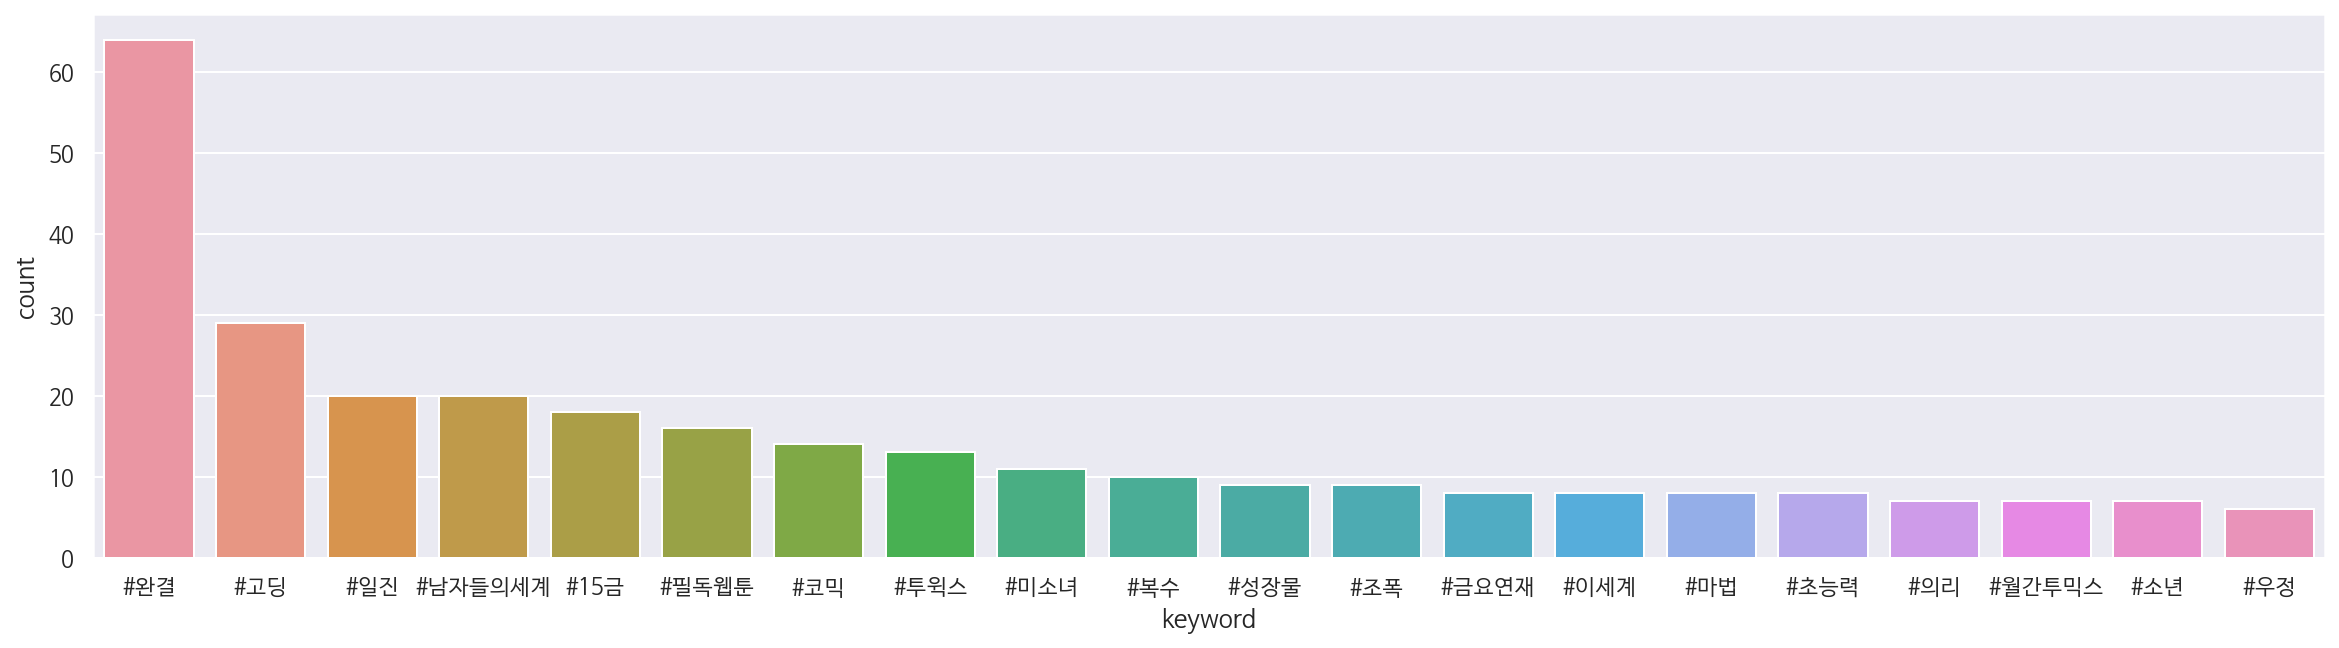

In [116]:
plt.figure(figsize=(20,5))

sns.barplot(x = 'keyword', y = 'count', data = df_keyword_rank[0:20])

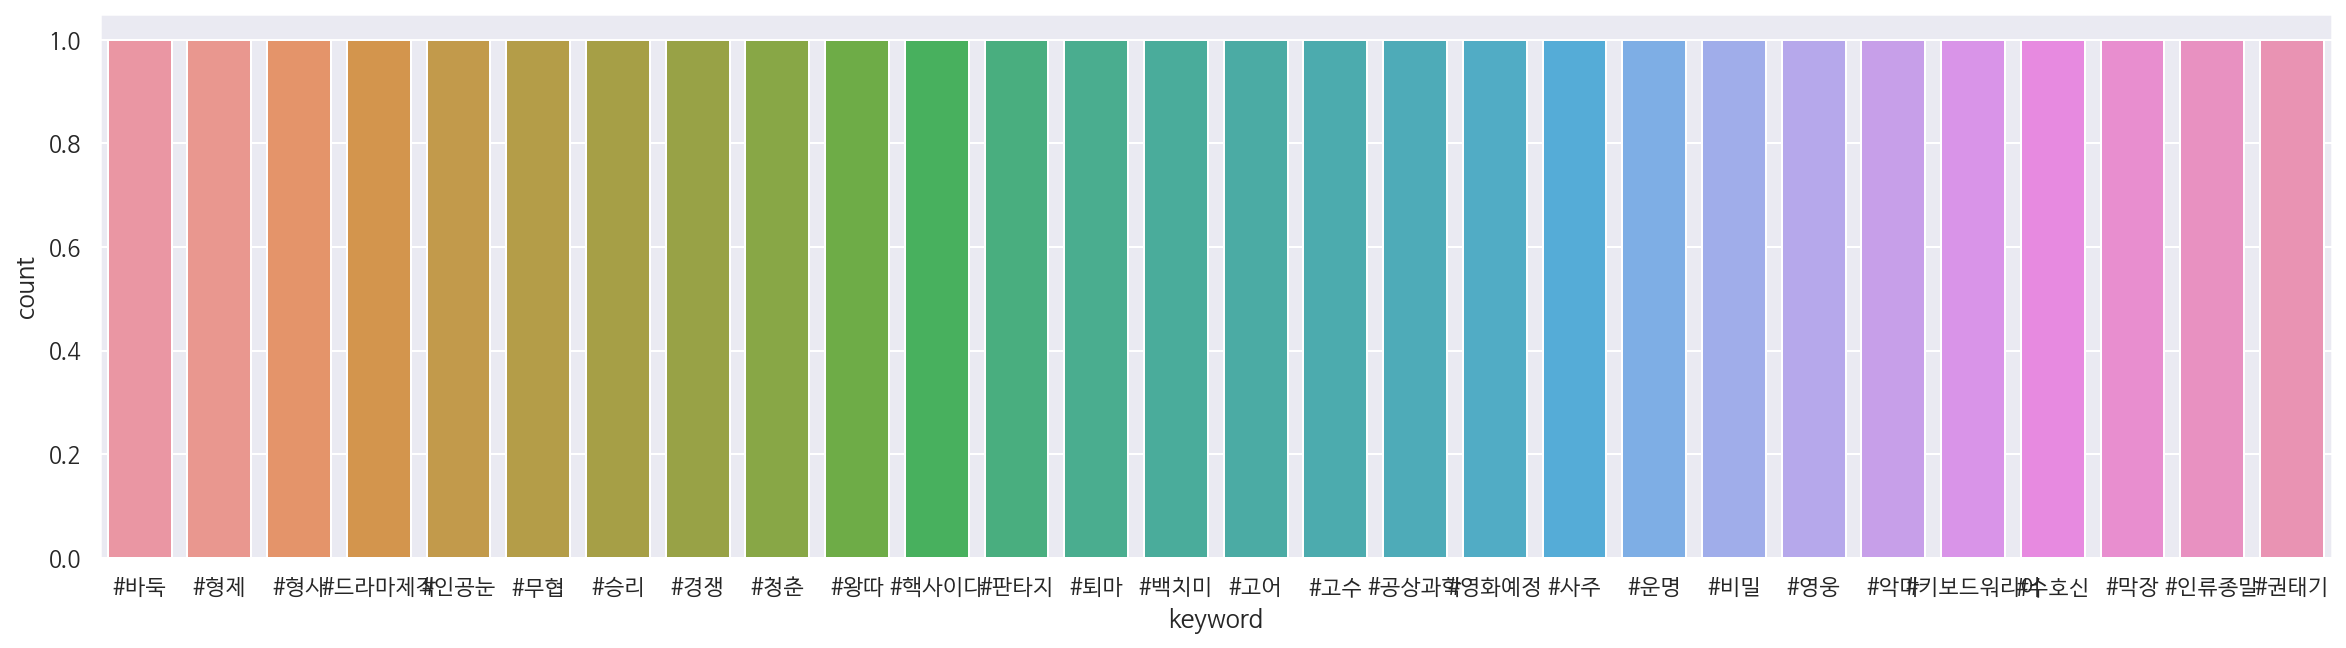

In [120]:
plt.figure(figsize=(20,5))

sns.barplot(x = 'keyword', y = 'count', data = df_keyword_rank[100:128])